<a href="https://colab.research.google.com/github/Suraj5188/Maschine_Learning/blob/main/Household_Electric_Power_Consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project : Household Electric Power Consumption**

#**Life cycle of data science project :**

**1. Importing Librarires**

**2. Load dataset**

**3. Feature Engineering**

**4. Data Cleaning/wrangling**

**5. EDA**

**6. Data Preprocessing**

**7. Train & Test split**

**8. Model Building**

**9. Model Evalution**



#**1. Import the necessary library**

In [1]:
pip install klib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(16,10)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
import os
import sys
import missingno as msno
import klib
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
import pickle

#**2. Load dataset**

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML_Dataset/household_power_consumption.txt",delimiter=';')

#**3. Dataset information**

In [4]:
df

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [5]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [6]:
df.shape

(2075259, 9)

In [7]:
df.nunique()

Date                     1442
Time                     1440
Global_active_power      6534
Global_reactive_power     896
Voltage                  5168
Global_intensity          377
Sub_metering_1            153
Sub_metering_2            145
Sub_metering_3             32
dtype: int64

In [8]:
df['Global_reactive_power'].value_counts()

0.000    472786
?         25979
0.100     21577
0.102     21473
0.098     21466
          ...  
0.636         1
1.108         1
1.030         1
0.658         1
0.69          1
Name: Global_reactive_power, Length: 896, dtype: int64

In [9]:
df.size

18677331

**Observation :**

In this dataset some rows contain '?' we need ton replace it them as np.nan

In [10]:
# copying dataset in df1 variable

df1=df.copy()
df1.replace('?',np.nan,inplace=True)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


**Observation :**

* In above dataset all feature has object data type we need to convert them into required data type as 'float'

In [12]:
# Converting dtype into float

df1['Global_active_power'] = df1['Global_active_power'].astype('float')
df1['Global_reactive_power'] = df1['Global_reactive_power'].astype('float')
df1['Voltage'] = df1['Voltage'].astype('float')
df1['Global_intensity'] = df1['Global_intensity'].astype('float')
df1['Sub_metering_1'] = df1['Sub_metering_1'].astype('float')
df1['Sub_metering_2'] = df1['Sub_metering_2'].astype('float')

Here, We had converted dtype into float

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


**Observation :**

* We had converted features dtype into rerquired format.

* still, Date & time features are seperate we will concating them next

In [14]:
# Convert the 'Date' and 'Time' columns to a single 'date_time' column
# by combining the two columns and converting to datetime format
df1['date_time'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    float64       
 3   Global_reactive_power  float64       
 4   Voltage                float64       
 5   Global_intensity       float64       
 6   Sub_metering_1         float64       
 7   Sub_metering_2         float64       
 8   Sub_metering_3         float64       
 9   date_time              datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 158.3+ MB


In [16]:
# Now we don't want Date & Time feature we will dropping them

df1.drop(['Date','Time'],axis=1,inplace=True)

In [17]:
df1.drop(['date_time'],axis=1,inplace=True)

#**4. Data Cleaning/wrangling**

In [18]:
df1.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

**Let's Understand the missing values by graphically for better understanding**

Text(0.5, 1.0, 'Missing Values')

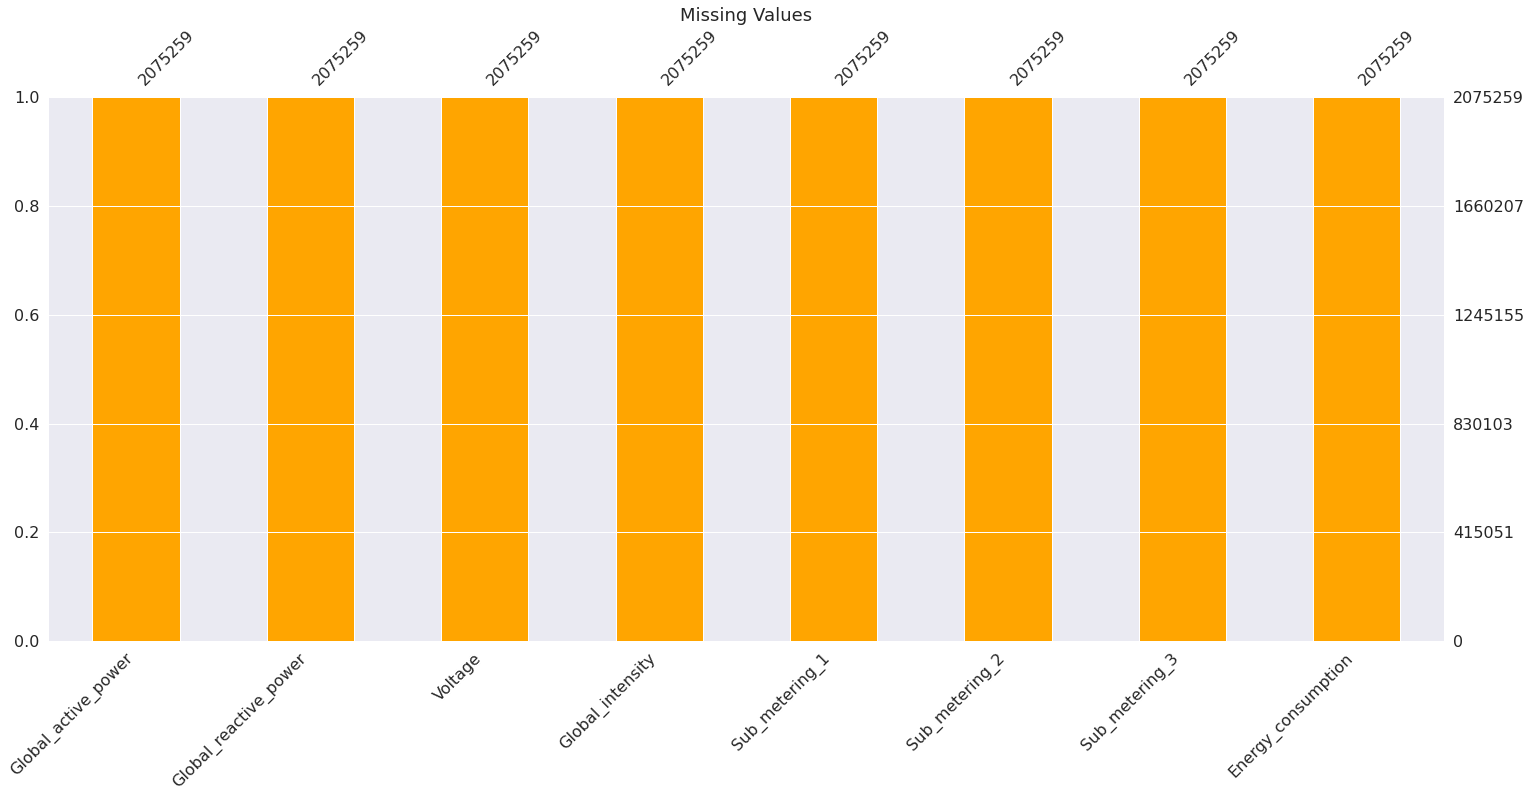

In [58]:
msno.bar(df1,color='orange')
plt.title('Missing Values')

In [20]:
# For just understanding the percentage of null values 

# Sum of null values in ascendind order
total=df1.isnull().sum().sort_values(ascending=False)

# Calculating the %age of null values
percent=(df1.isnull().sum() / df1.isnull().count()).sort_values(ascending=False)

missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
missing_data

,Total,Percent
Global_active_power,25979,0.012518
Global_reactive_power,25979,0.012518
Voltage,25979,0.012518
Global_intensity,25979,0.012518
Sub_metering_1,25979,0.012518
Sub_metering_2,25979,0.012518
Sub_metering_3,25979,0.012518


Here, lot of missing values we will filled them using imputations

In [21]:
# Using for loop to filled missing values for each feature

for i in df1.describe().columns:
    df1[i].replace(np.nan,df1[i].median(),inplace=True)

In [22]:
df1.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

Giving dataset their energy consumption hadn't given so we need to calculate them

In [23]:
df1['Energy_consumption'] = (df1['Global_active_power'] * 1000/60) - (df1['Sub_metering_1'] + df1['Sub_metering_2'] + df1['Sub_metering_3'])

In [24]:
df1['Energy_consumption'].value_counts()

9.033333      26939
3.500000      11335
5.000000      10440
3.700000      10312
4.933333      10094
              ...  
109.666667        1
63.600000         1
65.133333         1
87.100000         1
33.800000         1
Name: Energy_consumption, Length: 5661, dtype: int64

In [25]:
df1.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumption
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


#**5. Summary of statistics**

In [26]:
df1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumption
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.085486e+00,1.234176e-01,2.408420e+02,4.602375e+00,1.107879e+00,1.282265e+00,6.390116e+00,9.311171e+00
std,1.052065e+00,1.120452e-01,3.219699e+00,4.422241e+00,6.115669e+00,5.787271e+00,8.406114e+00,9.525778e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.100000e-01,4.800000e-02,2.390200e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.833333e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.566667e+00
75%,1.520000e+00,1.920000e-01,2.428600e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.023333e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


#**6. Distributions of the variables/features**

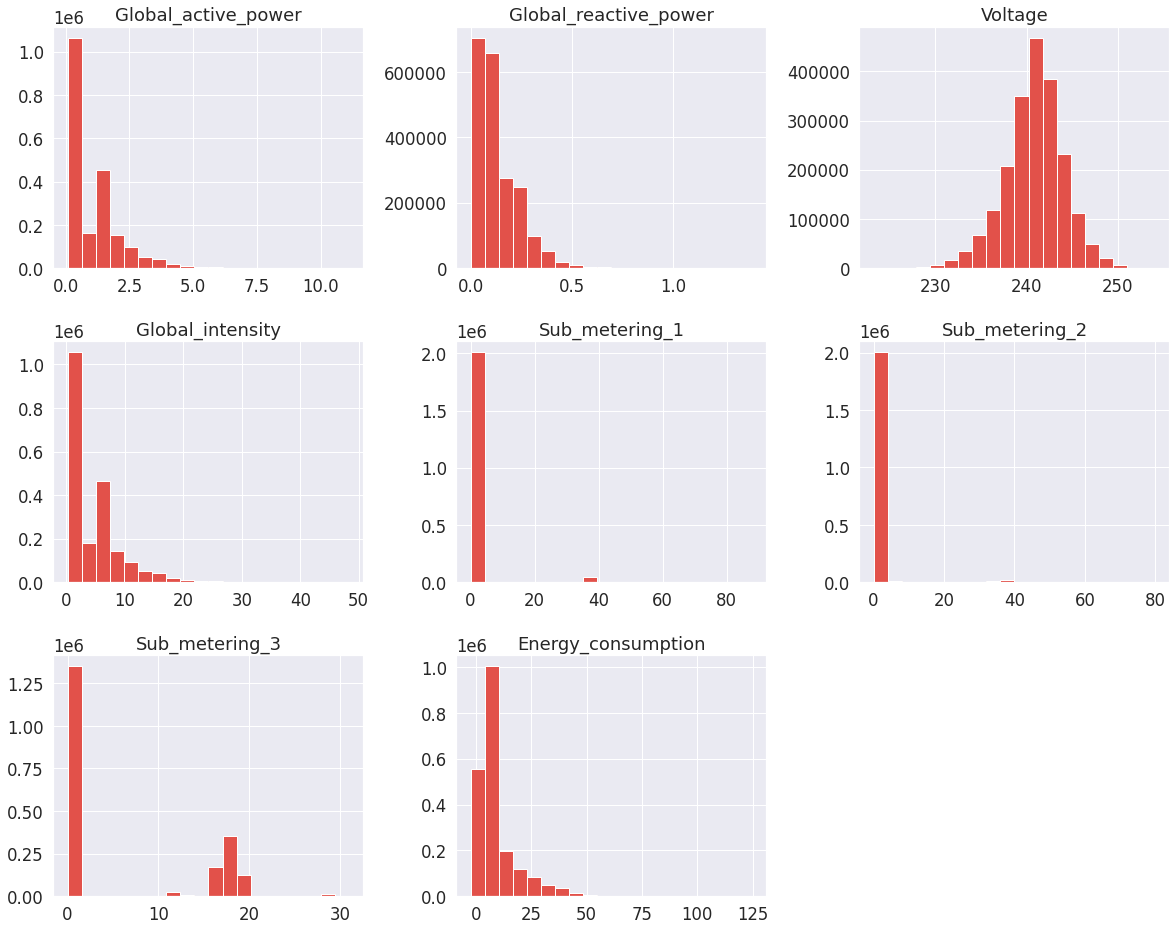

In [27]:
df1.hist(figsize=(20,16),bins=20)
plt.show()

**The next step in the task is deal with outliers, let’s have a look at the outliers and then we will see how we can deal with the outliers**

#**7. Univariate Analysis**

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


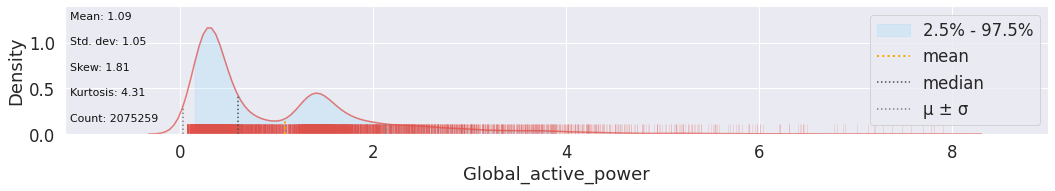

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


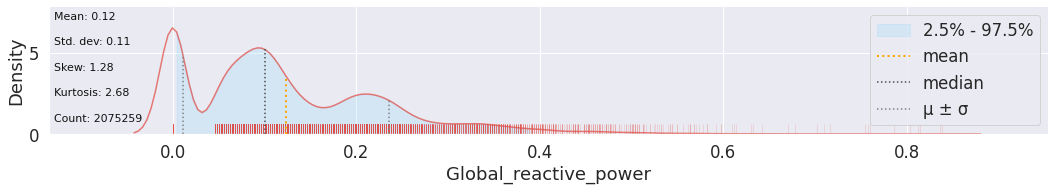

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


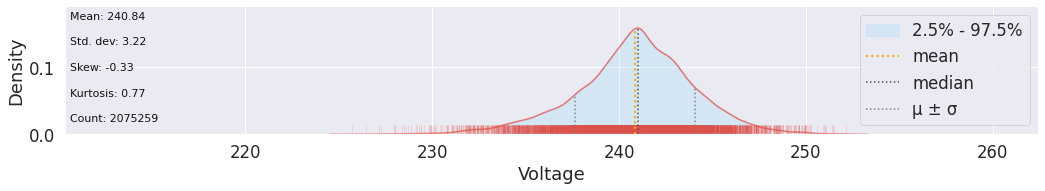

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


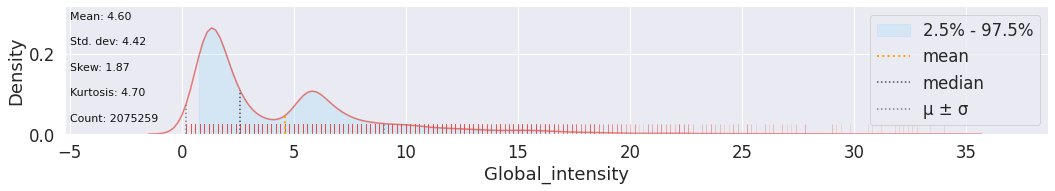

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


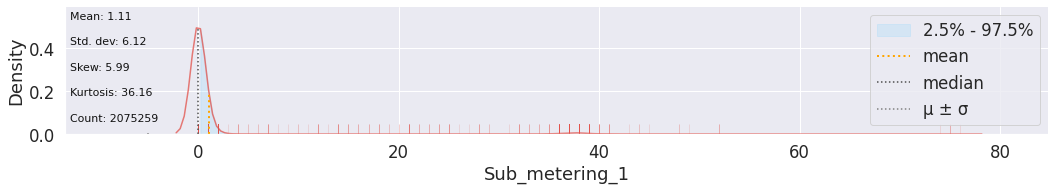

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


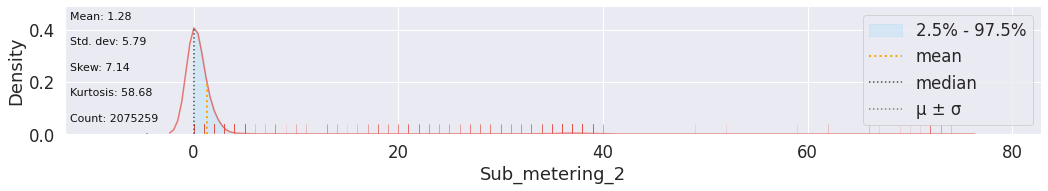

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


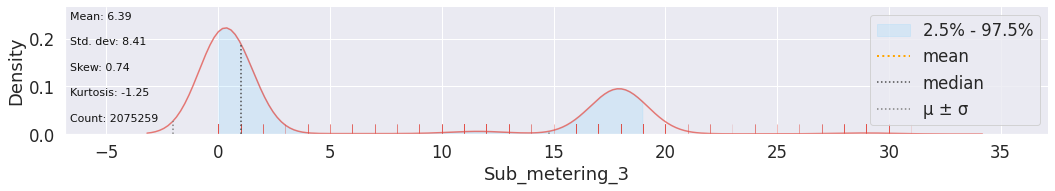

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


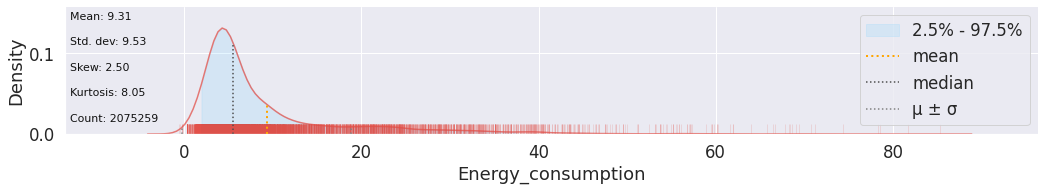

In [28]:
for feature in df1.columns:
    #sns.distplot(x=numerical[feature])
    klib.dist_plot(df1[feature])
    plt.show()

#**8. Correlation Matrix**

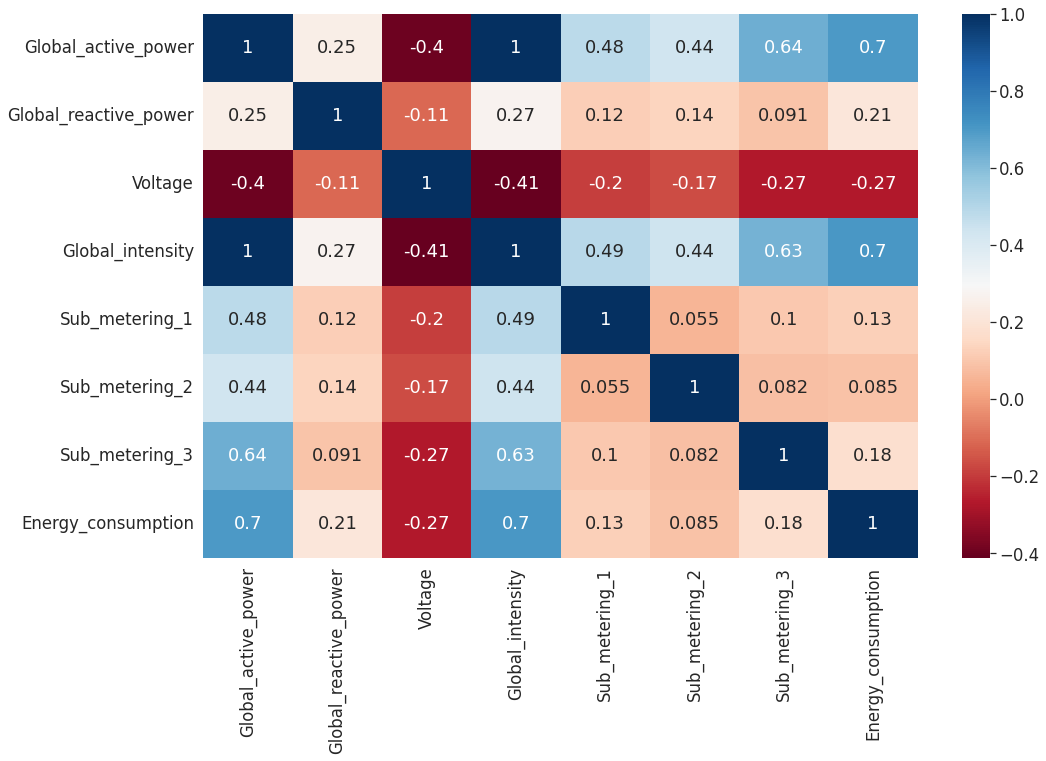

In [29]:
corr_p = df1.corr()
sns.heatmap(corr_p,cmap='RdBu',annot=True)
plt.show()

**Observation :**

* Dark color represents a positive correlation between numerical features.

In [30]:
#klib.corr_plot(df,target='Energy_consumption')

In [31]:
# Understanding numerical way
df1.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumption
Global_active_power,1.000000,0.247835,-0.399523,0.998891,0.484707,0.435142,0.639772,0.700607
Global_reactive_power,0.247835,1.000000,-0.112351,0.266900,0.123531,0.139736,0.091057,0.211642
Voltage,-0.399523,-0.112351,1.000000,-0.411121,-0.196051,-0.167496,-0.267892,-0.271384
Global_intensity,0.998891,0.266900,-0.411121,1.000000,0.489600,0.440909,0.627776,0.702507
Sub_metering_1,0.484707,0.123531,-0.196051,0.489600,1.000000,0.055201,0.103755,0.125108
Sub_metering_2,0.435142,0.139736,-0.167496,0.440909,0.055201,1.000000,0.082437,0.085256
Sub_metering_3,0.639772,0.091057,-0.267892,0.627776,0.103755,0.082437,1.000000,0.178494
Energy_consumption,0.700607,0.211642,-0.271384,0.702507,0.125108,0.085256,0.178494,1.000000


**Distribution of the target variables**

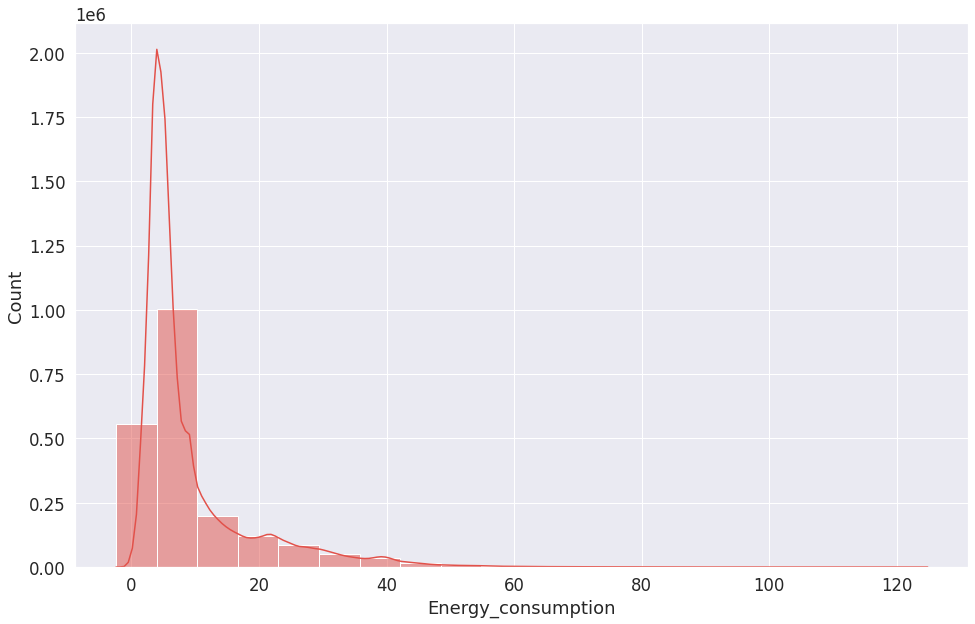

In [34]:
# Distribution of the target variables
sns.histplot(data=df1, x='Energy_consumption', bins=20, kde=True)
plt.show()

**Here we check multicollinearity using vif**

In [35]:
# another methood

X = df1.drop('Energy_consumption',axis=1)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["feature"] = X.columns
  
# calculating VIF
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif.round(2))

                 feature      VIF
0    Global_active_power  1271.01
1  Global_reactive_power     2.90
2                Voltage     3.07
3       Global_intensity  1276.51
4         Sub_metering_1     1.66
5         Sub_metering_2     1.57
6         Sub_metering_3     3.63


**Observation :**

* Now here Global_active_power &  Global_intensity has vif values greather 5 & 10 so will drop them in next step

#**Assumptions for Linear Regression**

**1. Linearity**

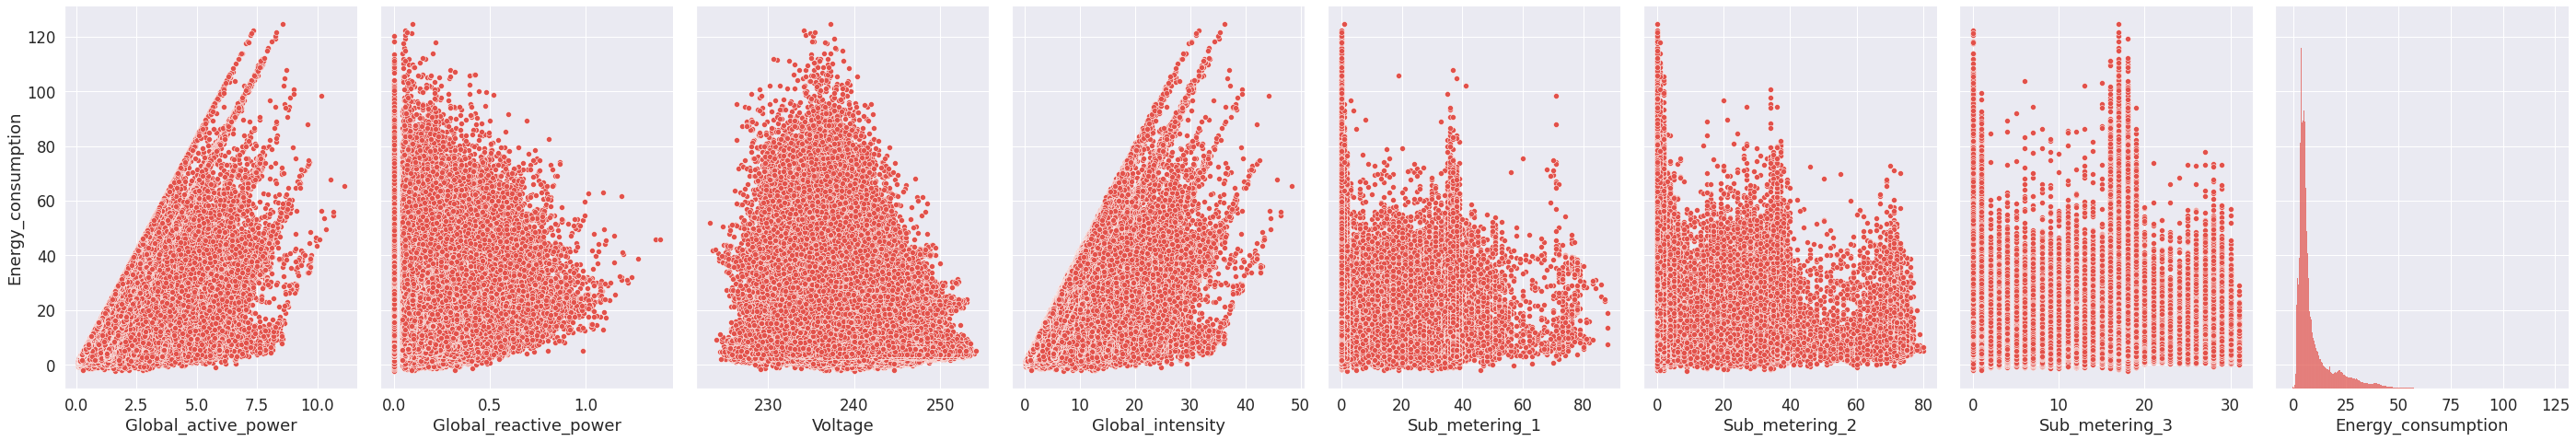

In [37]:
p = sns.pairplot(df1,x_vars=df1.columns,y_vars='Energy_consumption', size=7,aspect = 0.7)
plt.tight_layout()
plt.show()

In [38]:
# Get dependent and independent variables - X and y
X = df1.drop(["Energy_consumption"],axis=1)
y = df1.Energy_consumption

In [39]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0,test_size=0.25)

**performing on x train**

In [50]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)
y_pred = regr.predict(X_train)
y_pred

array([3.73333333, 5.03333333, 5.13333333, ..., 2.63333333, 3.03333333,
       4.83333333])

In [51]:
y_pred

array([3.73333333, 5.03333333, 5.13333333, ..., 2.63333333, 3.03333333,
       4.83333333])

In [52]:
# R squared
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=y_pred)))

# Mean of Residuals

residuals = y_train.values-y_pred
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

R squared: 1.0
Mean of Residuals 1.6617486764346504e-14


In [57]:
MSE_train = mean_squared_error(y_train, y_pred)
print(f'MSE= {MSE_train}')

# root mean squared
RMSE_train = np.sqrt(MSE_train)
print(f'RMSE= {RMSE_train}')

R2_Score_train = r2_score(y_train, y_pred)
print(f'R2_Score= {R2_Score_train}')
     

MSE= 8.989365688110545e-28
RMSE= 2.9982270908172624e-14
R2_Score= 1.0


**Goldfeld Quandt Test**

In [44]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.0053135816117043), ('p-value', 0.009706060667909215)]

**Observation :**

Since p value is less than 0.05 in Goldfeld Quandt Test, we can reject it's null hypothesis that error terms are heteroscedastic.

**4. Check for Normality of error terms/residuals**

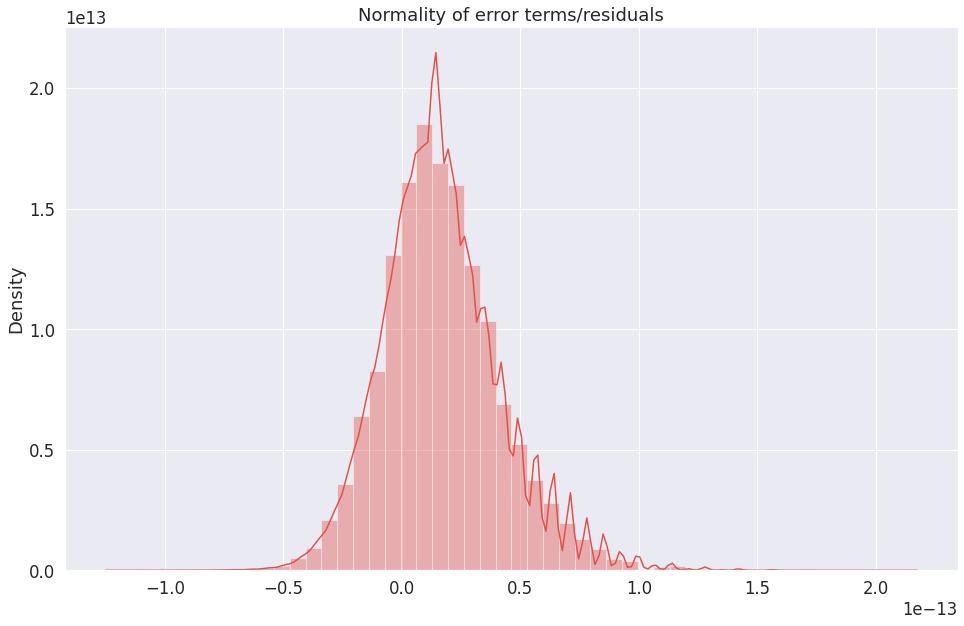

In [45]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')